In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import torch
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/diamonds/diamonds.csv


In [2]:
data = pd.read_csv('/kaggle/input/diamonds/diamonds.csv')

In [3]:
print(data)

       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  

In [4]:
data=data.drop(data.columns[[0]],axis=1)

In [5]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
data['cut']=pd.Categorical(data['cut'])

In [7]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
dfcut=pd.get_dummies(data['cut'],prefix='cut')

In [9]:
dfcut

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0
...,...,...,...,...,...
53935,0,0,1,0,0
53936,0,1,0,0,0
53937,0,0,0,0,1
53938,0,0,0,1,0


In [10]:
data=pd.concat([data,dfcut],axis=1)

In [11]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,0,0
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,0,0
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,0,1
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,1,0


In [12]:
data=data.drop(['cut'],axis=1)

In [13]:
data['color']=pd.Categorical(data['color'])

In [14]:
dfcolor=pd.get_dummies(data['color'],prefix='color')

In [15]:
data['clarity']=pd.Categorical(data['clarity'])

In [16]:
dfclar=pd.get_dummies(data['clarity'],prefix='clar')

In [17]:
dfcolor

,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
53935,1,0,0,0,0,0,0
53936,1,0,0,0,0,0,0
53937,1,0,0,0,0,0,0
53938,0,0,0,0,1,0,0


In [18]:
dfclar

,clar_I1,clar_IF,clar_SI1,clar_SI2,clar_VS1,clar_VS2,clar_VVS1,clar_VVS2
0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
53935,0,0,1,0,0,0,0,0
53936,0,0,1,0,0,0,0,0
53937,0,0,1,0,0,0,0,0
53938,0,0,0,1,0,0,0,0


In [19]:
data=pd.concat([data,dfcolor,dfclar],axis=1)

In [20]:
data=data.drop(['color','clarity'],axis=1)

In [21]:
data

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clar_I1,clar_IF,clar_SI1,clar_SI2,clar_VS1,clar_VS2,clar_VVS1,clar_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [22]:
Y=np.asarray(data['price'])

In [23]:
X=data.values

In [24]:
print(X)

[[ 0.23 61.5  55.   ...  0.    0.    0.  ]
 [ 0.21 59.8  61.   ...  0.    0.    0.  ]
 [ 0.23 56.9  65.   ...  0.    0.    0.  ]
 ...
 [ 0.7  62.8  60.   ...  0.    0.    0.  ]
 [ 0.86 61.   58.   ...  0.    0.    0.  ]
 [ 0.75 62.2  55.   ...  0.    0.    0.  ]]


In [25]:
data=data.drop(['price'],axis=1)

In [26]:
data

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clar_I1,clar_IF,clar_SI1,clar_SI2,clar_VS1,clar_VS2,clar_VVS1,clar_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,5.69,5.75,3.61,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,5.66,5.68,3.56,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,6.15,6.12,3.74,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [27]:
X=data.values

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0,test_size=0.2)

In [30]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train,random_state=0,test_size=0.2)

In [31]:
import torch.nn.functional as F

In [32]:
import torch.nn as nn

In [33]:
from torch import optim

In [34]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [35]:
scaler = StandardScaler()

In [36]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
print (X_train,X_test)

[[ 0.23377784 -0.52780434 -0.20591562 ... -0.54184836 -0.27113524
  -0.32385821]
 [ 1.07451372  0.31042922 -0.20591562 ... -0.54184836 -0.27113524
  -0.32385821]
 [-0.16557171  0.03101803 -1.10132274 ... -0.54184836 -0.27113524
  -0.32385821]
 ...
 [ 0.94840333  0.5898404   0.24178793 ...  1.84553481 -0.27113524
  -0.32385821]
 [ 0.61210898  1.28836837 -0.65361918 ... -0.54184836 -0.27113524
  -0.32385821]
 [-0.81714201  0.38028201 -0.20591562 ...  1.84553481 -0.27113524
  -0.32385821]] [[ 0.63312738  0.17072363 -1.10132274 ... -0.54184836 -0.27113524
  -0.32385821]
 [ 1.03247692  0.5898404  -0.65361918 ... -0.54184836 -0.27113524
  -0.32385821]
 [ 0.84331135 -0.45795154  0.24178793 ... -0.54184836 -0.27113524
  -0.32385821]
 ...
 [ 0.59109059  1.14866278 -1.10132274 ... -0.54184836 -0.27113524
  -0.32385821]
 [ 0.4649802  -0.17854036 -0.20591562 ... -0.54184836  3.68819629
  -0.32385821]
 [-0.62797644  2.12660192  0.24178793 ... -0.54184836 -0.27113524
   3.08777107]]


In [38]:
import matplotlib.pyplot as plt

In [39]:
minmax_scaler = MinMaxScaler()

In [40]:
Y_train = minmax_scaler.fit_transform(Y_train.reshape(-1,1))
Y_test = minmax_scaler.transform(Y_test.reshape(-1,1))

In [41]:
X_train,Y_train,X_val,Y_val,X_test,Y_test=map(torch.tensor,(X_train,Y_train,X_val,Y_val,X_test,Y_test))

In [42]:
X_train

tensor([[ 0.2338, -0.5278, -0.2059,  ..., -0.5418, -0.2711, -0.3239],
        [ 1.0745,  0.3104, -0.2059,  ..., -0.5418, -0.2711, -0.3239],
        [-0.1656,  0.0310, -1.1013,  ..., -0.5418, -0.2711, -0.3239],
        ...,
        [ 0.9484,  0.5898,  0.2418,  ...,  1.8455, -0.2711, -0.3239],
        [ 0.6121,  1.2884, -0.6536,  ..., -0.5418, -0.2711, -0.3239],
        [-0.8171,  0.3803, -0.2059,  ...,  1.8455, -0.2711, -0.3239]],
       dtype=torch.float64)

In [43]:
def init_weights(m):
    if type(m)==nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight,nn.init.calculate_gain('leaky_relu'))
        m.bias.data.fill_(0.01)
    

In [44]:
class FirstNetwork_v3(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(26, 16), 
        nn.LeakyReLU(negative_slope=0.2), 
        nn.Linear(16,16),
        nn.LeakyReLU(negative_slope=0.2), 
        nn.Linear(16,32),
        nn.LeakyReLU(negative_slope=0.2),
        nn.Linear(32,1),
        nn.LeakyReLU(negative_slope=0.2)
    )
    self.net.apply(init_weights)
    
  def forward(self, X):
    return self.net(X)

In [45]:
def fit_v2(x, y, model, opt, loss_fn, epochs = 1000,mini_batch_size=128):
  
    loss_list=[]
    val_loss_list=[]
    for epoch in range(epochs):

        loss = loss_fn(model(x), y)
        loss.backward()
        opt.step()
        opt.zero_grad()
        
        loss_list.append(loss)
        #val_loss_list.append(loss_fn(fn.forward(X_test),Y_test))
    plt.plot(loss_list)
    plt.plot(val_loss_list)
    plt.show()
    return loss.item()

In [46]:
import time

In [47]:
X_train.shape[0]

34521

In [48]:
X_train=X_train.float()

In [49]:
Y_train=Y_train.float()

In [50]:
X_val=X_val.float()

In [51]:
Y_val=Y_val.float()

In [52]:
Y_val.shape

torch.Size([8631])

In [53]:
device = torch.device("cuda")

In [54]:
fn = FirstNetwork_v3()
fn.to(device)


FirstNetwork_v3(
  (net): Sequential(
    (0): Linear(in_features=26, out_features=16, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=16, out_features=32, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
  )
)

In [55]:
import torch

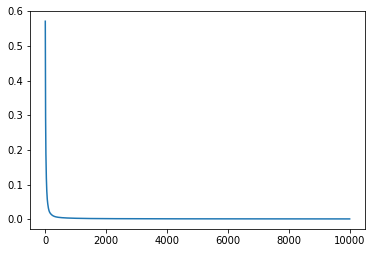

Final loss 0.0008157852571457624
Time taken 24.828064680099487


In [56]:
X_train=X_train.to(device)
Y_train=Y_train.to(device)
fn = FirstNetwork_v3()
fn.to(device)
X_val=X_val.to(device)
Y_val=Y_val.to(device)
loss_fn = F.mse_loss
opt = optim.Adam(fn.parameters(), lr=0.001,weight_decay=0.0001,betas=[0.9,0.999])
opt2 = optim.SGD(fn.parameters(), lr=0.01)
tic = time.time()
print('Final loss', fit_v2(X_train, Y_train, fn, opt, loss_fn,epochs=10000,mini_batch_size=128))
toc = time.time()
print('Time taken', toc - tic)

In [57]:
from sklearn.metrics import r2_score

In [58]:
y_pred_train=fn.forward(X_train)

# Training Accuracy

In [59]:
print (r2_score(y_pred_train.cpu().detach().numpy(),Y_train.cpu().numpy())*100,'%')

98.20784685423489 %


In [60]:
X_test=X_test.float()
X_test=torch.tensor(X_test)
X_test=X_test.to(device)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [61]:
Y_pred=fn.forward(X_test)

In [62]:
Y_test=Y_test.to("cpu")

In [63]:
Y_pred=Y_pred.to("cpu")

In [64]:
Y_pred=Y_pred.cpu().detach().numpy()
#Y_test=Y_test.cpu().detach().numpy()

# Test Accuracy

In [65]:
print(r2_score(Y_pred,Y_test)*100,'%')

98.05833303102817 %
